In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [2]:
# data for medianulation from all hurricanes

median_sandy = "./CleanEconData/Sandy_cln_median.csv"
median_sandy_df = pd.read_csv(median_sandy)
median_sandy_df = median_sandy_df[['Location','Hurricane','Median','Delta']]

median_rita = "./CleanEconData/rita_cln_median.csv"
median_rita_df = pd.read_csv(median_rita)
median_rita_df = median_rita_df[['Location','Hurricane','Median','Delta']]

median_katrina = "./CleanEconData/katrina_cln_median.csv"
median_katrina_df = pd.read_csv(median_katrina)
median_katrina_df = median_katrina_df[['Location','Hurricane','Median','Delta']]

median_ike = "./CleanEconData/Ike_cln_median.csv"
median_ike_df = pd.read_csv(median_ike)
median_ike_df = median_ike_df[['Location','Hurricane','Median','Delta']]

median_ivan = "./CleanEconData/Ivan_cln_median.csv"
median_ivan_df = pd.read_csv(median_ivan)
median_ivan_df = median_ivan_df[['Location','Hurricane','Median','Delta']]

# print(median_katrina_df)

In [3]:
#merge on Delta with value between -4 and 10

median_merge_df = pd.concat([median_sandy_df,median_katrina_df,median_ike_df,median_ivan_df,median_rita_df ])

median_merge_df = median_merge_df[median_merge_df['Delta'].between(-4,7)]


median_merge_df.head()


,Location,Hurricane,Median,Delta
0,Cape May,Sandy,54423,-4
1,Cape May,Sandy,49797,-3
2,Cape May,Sandy,51585,-2
3,Cape May,Sandy,52312,-1
4,Cape May,Sandy,55175,0


In [4]:
median_merge_df = median_merge_df.pivot_table( values = ['Median'], index=['Delta'], columns = 'Hurricane').reset_index()
median_merge_df.head()

Delta   Median                                    
Hurricane            Ike     Ivan  Katrina     Rita    Sandy
0            -4  41922.0      NaN  26844.0  43279.0  54423.0
1            -3  44085.0  34160.0  26711.0  42704.0  49797.0
2            -2  47159.0  34528.0  27478.0  42262.0  51585.0
3            -1  49977.0  35347.0  27355.0  41922.0  52312.0
4             0  51484.0  38286.5  30216.0  45622.0  55847.5

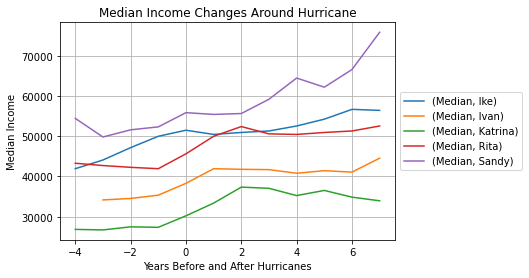

In [5]:
median_merge_df.plot(x = 'Delta')
plt.title('Median Income Changes Around Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Median Income')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/MedianIncomeGraph.png')